Importing the libraries


In [53]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import imblearn
from imblearn.over_sampling import SMOTE
import re
import pickle
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

Read the Dataset

In [2]:
import csv
from scipy.sparse import data
data = pd.read_csv(r'/content/sample_data/mnist_test.csv')
data

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df= pd.read_csv("spam.csv",encoding="latin")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Handling missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [55]:
df.rename({"v1":"label","v2":"text"},inplace=True,axis=1)

In [56]:
df

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


 Handling Categorical Values

In [57]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [58]:
x = df['text']
y = df['label']

In [59]:
vectorizer = CountVectorizer()

In [60]:
x_transformed = vectorizer.fit_transform(x)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.2, random_state=42)

Handling Imbalance Data

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

In [101]:
print("Before oversampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before oversampling, count of label '0': {}".format(sum(y_train == 0)))

Before oversampling, count of label '1': 581
Before oversampling, count of label '0': 3876


In [102]:
smote = SMOTE(random_state=42)

In [104]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

NameError: ignored

In [107]:
print("After OverSampling, count of label '1': {}" .format(sum(y_resampled == 1 )))
print("After OverSampling, count of label '0': {}" .format(sum(y_resampled == 0 )))

NameError: ignored

Cleaning the text data

In [10]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [12]:
import re
corpus = []
length = len(df)

In [65]:
for i in range(0,length):
    text = re.sub("[^a-zA-Z0-9]"," ",df["text"][i]) 
    text = text.lower()
    text = text.split()
    pe = PorterStemmer()
    stopword = stopwords.words("english")
    text = [pe.stem(word) for word in text if not word in set(stopword)]
    text =" ".join(text)
    corpus.append(text)


In [14]:
corpus

[]

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
X = cv.fit_transform(corpus).toarray()

In [17]:
import pickle
pickle.dump(cv, open('cv1.pk1','wb'))

Descriptive Statistical

In [19]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [20]:
df.shape

(5572, 5)

Univariate Analysis

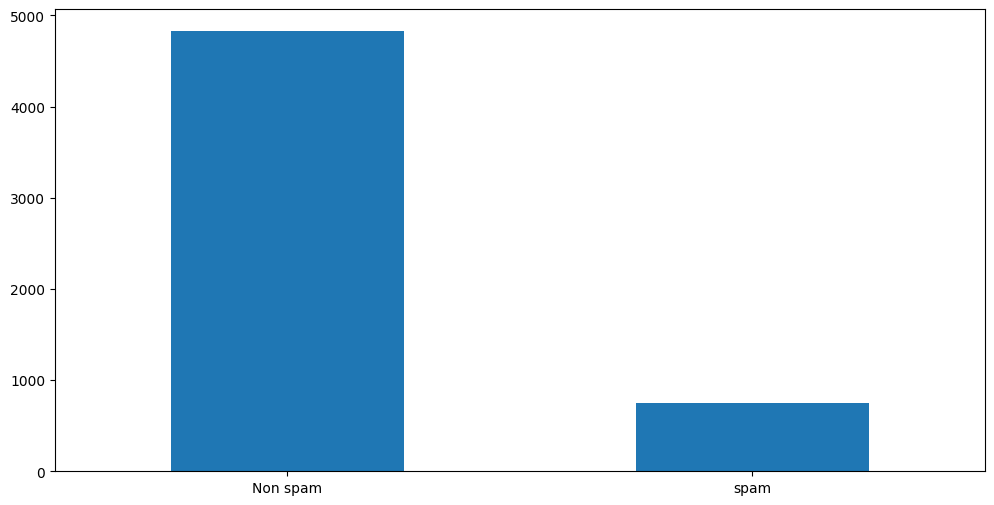

In [67]:
df["label"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ('Non spam', 'spam'),rotation=0);

In [90]:
from tkinter.font import names
x_bal = [[1, 2], [3, 4], [5, 6]]
names = ['label', 'text']

Scaling the Data

In [91]:
sc=StandardScaler()
x_bal_scaled = sc.fit_transform(x_bal)

In [92]:
print(x_bal_scaled)

[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


Splitting data into train and test

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

Decision Tree Model

In [71]:
from sqlalchemy.sql.functions import mode
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train_res,y_train_res)

NameError: ignored

Random Forest Model

In [72]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train_res, y_train_res)

NameError: ignored

 Naïve Bayes model

In [26]:
from operator import mod
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [111]:
print('Naive Bayes accuracy:', accuracy)

NameError: ignored

In [73]:
model.fit(x_train_res, y_train_res)

NameError: ignored

 ANN model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential()

In [74]:
x_train.shape

(4457,)

In [149]:
model.add(Dense(units = x_train_res.shape[1],activation = "relu",kernel_initiallizers = "random_unifrom"))

NameError: ignored

In [32]:
model.add(Dense(units=100,activation="relu",kernel_initializer="random_uniform"))

In [33]:
model.add(Dense(units=100,activation="relu",kernel_initializer="random_uniform"))

In [34]:
model.add(Dense(units=1,activation="sigmoid"))

In [35]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [150]:
from numpy.random import Generator
generator = model.fit(x_train_res,y_train_res,epochs=10,steps_per_epoch=len(x_train_res)//64)

NameError: ignored

In [151]:
from nltk.translate import metrics
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
#Create an ANN modelneith one hidden layer and an output layer
model = Sequential()
model.add(Dense(10, input_dim=X.shape[i], activation='relu'))
model.add(Dense(1, activation+'sigmoid'))

#Complie the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

#Evaluate the accuracy of the model on the testing data
accuracy = model.Evaluate(X_test, y_test, verbose=0)[1]
print('Ann accuracy:', accuracy)

IndexError: ignored

 Testing the model


In [124]:
y_pred=model.predict(x_test)
y_pred

35/35 [==============================] - 0s 1ms/step


array([[b'Aight should I just plan to come up later tonight?'],
       [b'Was the farm open?'],
       [b'I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones'],
       ...,
       [b'I will be gentle princess! We will make sweet gentle love...'],
       [b'Beautiful Truth against Gravity.. Read carefully: \\Our heart feels light when someone is in it.. But it feels very heavy when someone leaves it..\\" GOOD NIGHT"'],
       [b'Ups which is 3days also, and the shipping company that takes 2wks. The other way is usps which takes a week but when it gets to lag you may have to bribe nipost to get your stuff.']],
      dtype=object)

In [131]:
y_pr = np.where(y_pred>0.5,1,0)
y_test

TypeError: ignored

In [80]:
y_test

4456    0
690     0
944     0
3768    0
1189    0
       ..
2906    0
1270    0
3944    0
2124    0
253     0
Name: label, Length: 1115, dtype: int64

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pr)
score = accuracy_score(y_test, y_pr)

print('Confusion Matrix:')
print(cm)
print('Accuracy Score Is: ' , score*100, '$')

NameError: ignored

In [137]:
from tables.file import File
import pickle

def new_review(new_review_text):
    with open('/content/cv1.pk1', 'rb') as file:
         cv = pickle.load(File)

In ANN we first have to save the model to the test the inputs

In [120]:
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]', ' ', new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word)for word in new_review if not word in set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = cv.transform(new_corpus).toarray()
  print(new_X_test)
  new_y_pred = model.predict(new_X_test)
  print(new_y_pred)
  new_X_pred = np.where(new_y_pred>0,5,1,0)
  return new_y_pred

In [121]:
new_review=new_review(str(input("Enter new review...")))

Enter new review...hello fg huo hkl
[[0 0 0 ... 0 0 0]]
1/1 [==============================] - 0s 134ms/step
[[0 0 0 ... 0 0 0]]


TypeError: ignored

Compare The Model

In [145]:
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(y_test, y_pred_binary)
score = accuracy_score(y_test, y_pred_binary)
print(cm)
print('accuracy score for naive bayes:', score * 100)

TypeError: ignored

In [136]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
print(cm)
print('accuracy score is:-',score*100)


ValueError: ignored

In [146]:
y_pred_binary = np.where(y_pred > 0.5, 1, 0)


TypeError: ignored

In [144]:
cm = confusion_matrix(y_test, y_pred)
/score=accuracy_score(y_test,y_pred)
print(cm)
print('Accuracy_Score Is:- ' ,score*100)

cm1 = confusion_matrix(y_test, y_pred1)
score1 = accuracy_score(y_test,y_pred1)
print(cm1)
print('Accuracy Score Is:- ' ,score*100)

ValueError: ignored

In [143]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
print(cm)
print('accuracy score is:-',score*100)

ValueError: ignored

Comparing model accuracy before & after applying
hyperparameter tuning

In [142]:
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
print(cm)
print('Accuracy Score Is:-',score*100)

ValueError: ignored

Saving our model

In [138]:
pickle.dump(cv,open('spam.pkl','wb'))

In [148]:
model.save('spam.h5')

ValueError: ignored